In [1]:
import pandas as pd
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

In [2]:
minetti_df = pd.read_csv('Minetti-2002 Equal Energy Cost.csv', header=None, names=['x', 'y'], index_col=0)
minetti_df = minetti_df[minetti_df.index>-30] #cleaning noise

In [3]:
strava_df = pd.read_csv('Strava Equal Heartrate.csv', header=None, names=['x', 'y'], index_col=0)
strava_df = strava_df[strava_df.index>-30] #cleaning noise

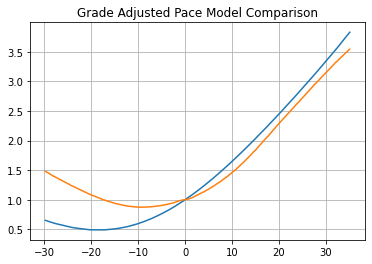

In [4]:
plt.title('Grade Adjusted Pace Model Comparison')
plt.plot(minetti_df.index, minetti_df['y'])
plt.plot(strava_df.index, strava_df['y'])
plt.grid()
plt.show()

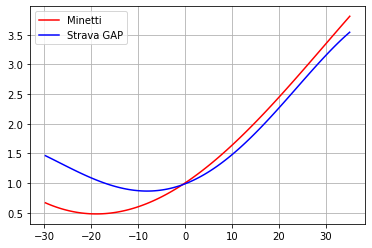

In [25]:
def sextic_func(x, a, b, c, d, e, f, g):
    return g*x**6 + a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
def quintic_func(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
def quartic_func(x, b, c, d, e, f):
    return b*x**4 + c*x**3 + d*x**2 + e*x + f
def cubic_func(x, c, d, e, f):
    return c*x**3 + d*x**2 + e*x + f
xdata = minetti_df.index
ydata = minetti_df['y']
popt, pcov = curve_fit(quartic_func, xdata, ydata)
plt.plot(xdata, quartic_func(xdata, *popt), 'r-', label='Minetti')

xdata = strava_df.index
ydata = strava_df['y']
popt, pcov = curve_fit(quartic_func, xdata, ydata)
plt.plot(xdata, quartic_func(xdata, *popt), 'b-', label='Strava GAP')

plt.legend()
plt.grid()
plt.show()

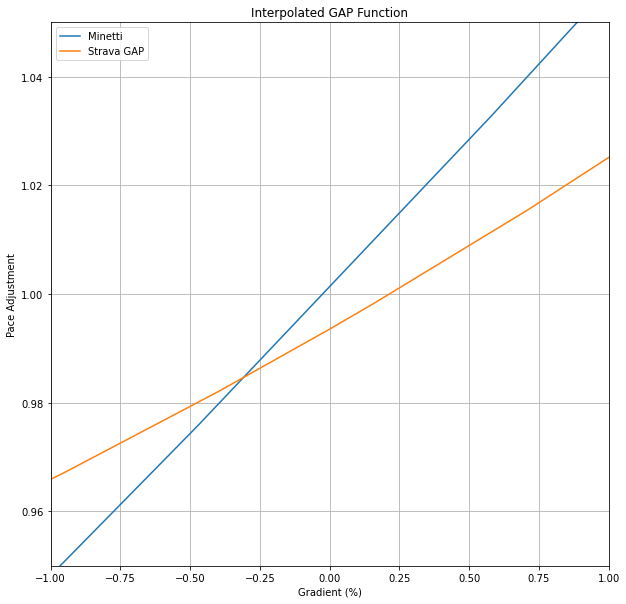

In [27]:
fig = plt.figure(figsize=(10, 10))

xdata = minetti_df.index
ydata = minetti_df['y']
popt, pcov = curve_fit(quintic_func, xdata, ydata)
plt.plot(xdata, quintic_func(xdata, *popt), label='Minetti')

xdata = strava_df.index
ydata = strava_df['y']
popt, pcov = curve_fit(quintic_func, xdata, ydata)
plt.plot(xdata, quintic_func(xdata, *popt), label='Strava GAP')
# plt.xlim(-2,2)
# plt.ylim(0.85,1.15)
plt.xlim(-1,1)
plt.ylim(0.95,1.05)

title = 'Interpolated GAP Function'
plt.title(title)
plt.xlabel('Gradient (%)')
plt.ylabel('Pace Adjustment')

plt.legend()
plt.grid()
plt.savefig(title + '.png')
plt.show()

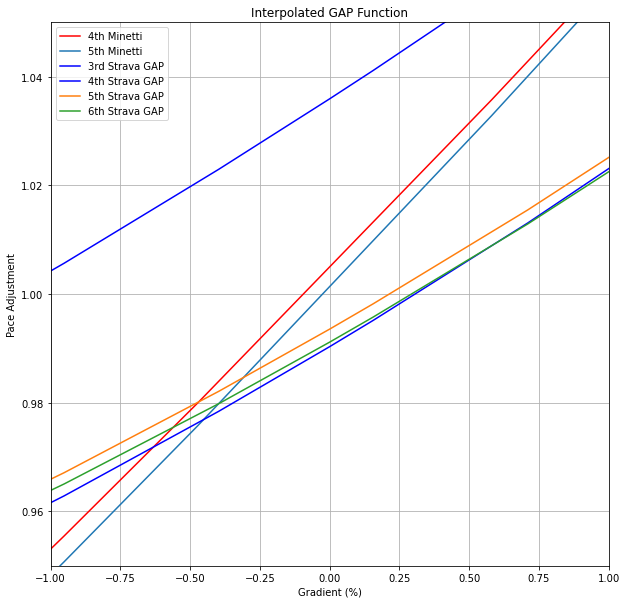

In [26]:
fig = plt.figure(figsize=(10, 10))

xdata = minetti_df.index
ydata = minetti_df['y']
popt, pcov = curve_fit(quartic_func, xdata, ydata)
plt.plot(xdata, quartic_func(xdata, *popt), 'r-', label='4th Minetti')
popt, pcov = curve_fit(quintic_func, xdata, ydata)
plt.plot(xdata, quintic_func(xdata, *popt), label='5th Minetti')

xdata = strava_df.index
ydata = strava_df['y']
popt, pcov = curve_fit(cubic_func, xdata, ydata)
plt.plot(xdata, cubic_func(xdata, *popt), 'b-', label='3rd Strava GAP')
popt, pcov = curve_fit(quartic_func, xdata, ydata)
plt.plot(xdata, quartic_func(xdata, *popt), 'b-', label='4th Strava GAP')
popt, pcov = curve_fit(quintic_func, xdata, ydata)
plt.plot(xdata, quintic_func(xdata, *popt), label='5th Strava GAP')
popt, pcov = curve_fit(sextic_func, xdata, ydata)
plt.plot(xdata, sextic_func(xdata, *popt), label='6th Strava GAP')
# plt.xlim(-2,2)
# plt.ylim(0.85,1.15)
plt.xlim(-1,1)
plt.ylim(0.95,1.05)

title = 'Interpolated GAP Function'
plt.title(title)
plt.xlabel('Gradient (%)')
plt.ylabel('Pace Adjustment')

plt.legend()
plt.grid()
plt.savefig(title + '.png')
plt.show()

In [8]:
strava_df[strava_df.index==0]

,y
x,
0.0,1.0


# get the gradient of gpx

In [9]:
df = pd.read_csv('Bayfront Park 7km.csv')

In [10]:
df

,time,Lat,Lon,Elevation,Distance
0,1970-01-01 00:00:00+00:00,43.271752,-79.873140,82.0,0.064522
1,1970-01-01 00:00:01+00:00,43.271731,-79.873113,81.9,0.067723
2,1970-01-01 00:00:02+00:00,43.271714,-79.873088,81.9,0.070495
3,1970-01-01 00:00:03+00:00,43.271694,-79.873061,81.8,0.073616
4,1970-01-01 00:00:04+00:00,43.271673,-79.873034,81.7,0.076817
...,...,...,...,...,...
1775,1970-01-01 00:29:35+00:00,43.271222,-79.873107,80.7,8.292009
1776,1970-01-01 00:29:36+00:00,43.271218,-79.873137,80.7,8.294484
1777,1970-01-01 00:29:37+00:00,43.271207,-79.873199,80.7,8.299664
1778,1970-01-01 00:29:38+00:00,43.271185,-79.873312,80.6,8.309157


In [11]:
# df['Elevation']/df['Distance']
df['Gradient'] = ((df['Elevation']-df['Elevation'].shift(1))/(df['Distance']-df['Distance'].shift(1))/1000)*100
df['Gradient'] = df['Gradient'].rolling(10).mean()

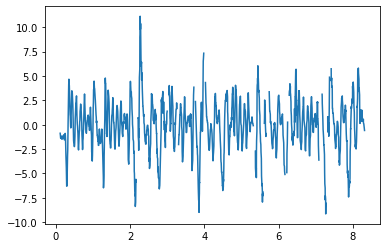

In [12]:
plt.plot(df['Distance'], df['Gradient'])
# plt.plot(df['Distance'], df['Elevation'])
plt.show()

In [13]:
# f = lambda x: x.max() - x.min()
f = lambda x: popt[0]*x**5 - popt[1]*x**4 - popt[2]*x**3 + popt[3]*x**2 + popt[4]*x + popt[5]

df['GAP'] = df['Gradient'].apply(f)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
df['GAP'].plot()

In [ ]:
df['GAP'].describe()

In [ ]:
class GAP:
    def __init__(self, df):
        self.df = df
    def gradientCalculation(self):
        df = self.df
        df['Gradient'] = ((df['Elevation']-df['Elevation'].shift(1))/(df['Distance']-df['Distance'].shift(1))/1000)*100
        df['Gradient'] = df['Gradient'].rolling(10).mean()
        self.df = df
    def func(x, a, b, c, d, e, f):
        return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
    def stravaGapParameters(self):
        strava_df = pd.read_csv('Strava Equal Heartrate.csv', header=None, names=['x', 'y'], index_col=0)
        strava_df = strava_df[strava_df.index>-30] #cleaning noise
        xdata = strava_df.index
        ydata = strava_df['y']
        self.popt, pcov = curve_fit(quartic_func, xdata, ydata)
    def GapCalculation(self):
        f = lambda x: self.popt[0]*x**5 - self.popt[1]*x**4 - self.popt[2]*x**3 + self.popt[3]*x**2 + self.popt[4]*x + self.popt[5]
        self.df['GAP'] = self.df['Gradient'].apply(f)
    def getCourseGAP(self):
        self.gradientCalculation()
        self.stravaGapParameters()
        self.GapCalculation()
        return self.df['GAP'].mean()

In [ ]:
GAP = GAP(pd.read_csv('Bayfront Park 7km.csv'))
GAP.getCourseGAP()
# GAP.makeGAPdf(pd.read_csv('Bayfront Park 7km.csv'))

In [ ]:
import GradeAdjustedPace
import pandas as pd

In [ ]:
GAP = GradeAdjustedPace.GAP(pd.read_csv('Bayfront Park 7km.csv'))
GAP.getCourseGAP()

In [ ]:
plt.scatter(course_info_df['Course Ave. GAP'], course_info_df['Total Elevation Gain (m)'])
# plt.ytitle('Elevation')
# plt.xtitle('GAP')
plt.show()

plt.scatter(course_info_df['Course Ave. GAP'], course_info_df['Hill Stdev'])
# plt.ytitle('Hill Stdev')
# plt.xtitle('GAP')
plt.show()